# 1. Install Dependencies and Setup

In [1]:
pip install tensorflow-macos tensorflow-metal opencv-python matplotlib

INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 7.7 MB/s  0:00:29m0:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 11.0 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 13.1 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 13.6 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 11.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [37]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 25.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 28.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.3.1
anyio                        4.10.0
appnope                      0.1.4
argon2-cffi                  25.1.0
argon2-cffi-bindings         25.1.0
arrow                        1.3.0
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.5
attrs                        25.3.0
babel                        2.17.0
beautifulsoup4               4.13.4
bleach                       6.2.0
certifi                      2025.8.3
cffi                         1.17.1
charset-normalizer           3.4.2
comm                         0.2.3
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.15
decorator                    5.2.1
defusedxml                   0.7.1
exceptiongroup               1.3.0
executing                    2.2.0
fastjsonschema               2.21.1
flatbuffers                  25

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


2025-08-06 16:02:35.952414: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-08-06 16:02:35.952449: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-06 16:02:35.952453: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-06 16:02:35.952475: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-06 16:02:35.952488: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

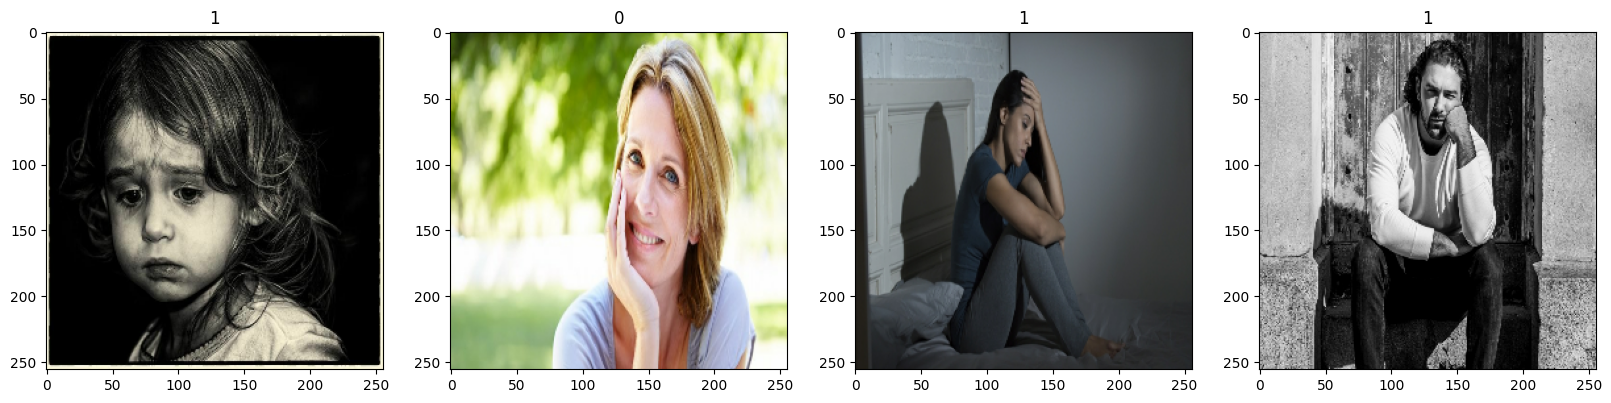

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.2528799 , 0.3313113 , 0.22542892],
          [0.22530638, 0.30373776, 0.19684437],
          [0.20784314, 0.28795955, 0.17310049],
          ...,
          [0.        , 0.07058824, 0.09803922],
          [0.        , 0.07349878, 0.09803922],
          [0.        , 0.07450981, 0.09803922]],
 
         [[0.25114363, 0.329575  , 0.22369266],
          [0.22579609, 0.30422747, 0.1978238 ],
          [0.20974265, 0.28904286, 0.1777157 ],
          ...,
          [0.        , 0.05919117, 0.08745835],
          [0.        , 0.06069192, 0.08664215],
          [0.        , 0.06468578, 0.08490589]],
 
         [[0.2460339 , 0.32336235, 0.21903962],
          [0.2238444 , 0.30117282, 0.19584195],
          [0.21011029, 0.28767568, 0.1804228 ],
          ...,
          [0.        , 0.04650735, 0.07540642],
          [0.        , 0.04650735, 0.07313974],
          [0.        , 0.05266831, 0.06876676]],
 
         ...,
 
         [[0.33858618, 0.45012543, 0.18838848],
          [0.36787

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [20]:
model = Sequential()

In [21]:
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2025-08-06 16:03:06.809914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.5402 - loss: 0.9405 - val_accuracy: 0.5000 - val_loss: 0.8314
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.5402 - loss: 0.7443 - val_accuracy: 0.7344 - val_loss: 0.6614
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.7009 - loss: 0.6432 - val_accuracy: 0.7188 - val_loss: 0.5772
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.7411 - loss: 0.5369 - val_accuracy: 0.7344 - val_loss: 0.4655
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.7411 - loss: 0.5449 - val_accuracy: 0.7500 - val_loss: 0.5708
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.7500 - loss: 0.5039 - val_accuracy: 0.8594 - val_loss: 0.4305
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.8616 - loss: 0.4444 - val_accuracy: 0.9375 - val_loss: 0.3113
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.8348 - loss: 0.3980 - val_accuracy: 0.9062 - val_loss: 0.2779
Epo

# 8. Plot Performance

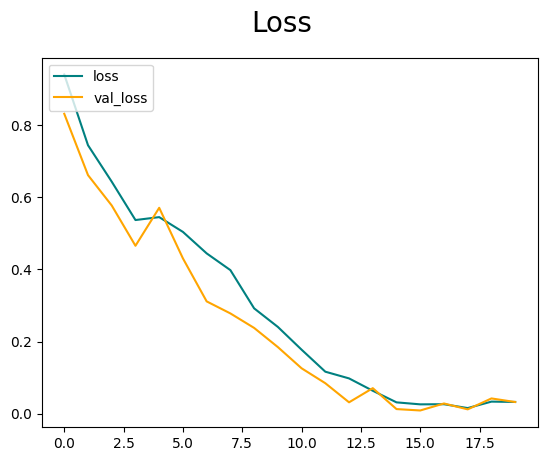

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

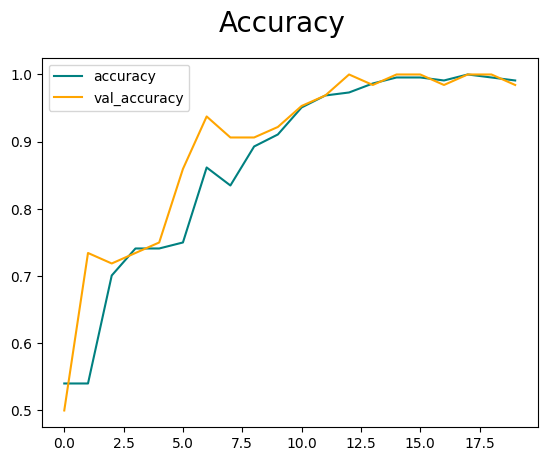

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre.reset_state()
re.reset_state()
acc.reset_state()

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for X, y in test:
    yhat = model.predict(X, verbose=0)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


2025-08-06 16:11:31.565641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
test_size = 0
for _ in test:
    test_size += 1
print("Test batches:", test_size)

Test batches: 1


2025-08-06 16:09:05.205240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [41]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = []
y_pred = []

for X, y in test:
    preds = model.predict(X, verbose=0)
    preds = tf.cast(preds > 0.5, tf.int32)
    y_true.extend(y.numpy())
    y_pred.extend(preds.numpy())

print(confusion_matrix(y_true, np.array(y_pred)))

[[13  1]
 [ 0  3]]


2025-08-06 16:10:51.888676: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [40]:
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(256, 256), batch_size=32)

data = data.map(lambda x, y: (tf.image.random_flip_left_right(x), y))
data = data.map(lambda x, y: (tf.image.random_brightness(x, max_delta=0.1), y))

Found 305 files belonging to 2 classes.


In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [44]:
import cv2

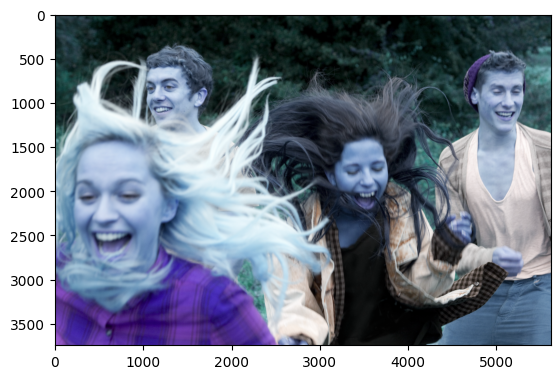

In [45]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

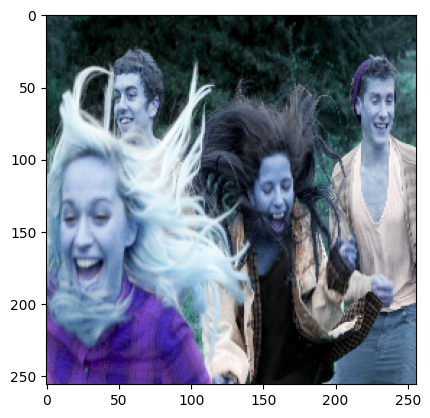

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [48]:
yhat

array([[0.0240061]], dtype=float32)

In [49]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [50]:
from tensorflow.keras.models import load_model

In [51]:
model.save(os.path.join('models', 'imageclassifier.keras'))

In [52]:
from keras.models import load_model

new_model = load_model('/Users/mrinaldhar/ImageClassification/models/imageclassifier.keras')

In [53]:
pred = (new_model.predict(np.expand_dims(resize/255, 0)) > 0.5).astype("int32")
print(pred)  # 0 or 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[0]]


In [54]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.0240061]], dtype=float32)

In [55]:
prob = new_model.predict(np.expand_dims(resize/255, 0))[0][0]

if prob > 0.5:
    print(f"Prediction: Class 1 with {prob*100:.2f}% confidence.")
else:
    print(f"Prediction: Class 0 with {(1-prob)*100:.2f}% confidence.")

print("\n--- Result Summary ---")
print("The model successfully processed the image and provided a prediction based on learned patterns.")
print("Probability scores indicate the confidence of the model in its classification decision.")
print("Further testing with a larger dataset is recommended to validate overall model performance.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Class 0 with 97.60% confidence.

--- Result Summary ---
The model successfully processed the image and provided a prediction based on learned patterns.
Probability scores indicate the confidence of the model in its classification decision.
Further testing with a larger dataset is recommended to validate overall model performance.
